In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# Данные предобработали с помощью скрипта (в репозитории)

In [15]:
train_data = pd.read_csv("data.csv", sep=",")
test_data = pd.read_csv("test.csv", sep=",")
train_data.drop(train_data.columns[train_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
test_data.drop(test_data.columns[test_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [16]:
train_data.sample(5)

,age,workclassISPrivate,workclassISSelf-emp-not-inc,workclassISSelf-emp-inc,workclassISFederal-gov,workclassISLocal-gov,workclassISState-gov,workclassISWithout-pay,workclassISNever-worked,fnlwgt,...,native-countryISNicaragua,native-countryISScotland,native-countryISThailand,native-countryISYugoslavia,native-countryISEl-Salvador,native-countryISTrinadad&Tobago,native-countryISPeru,native-countryISHong,native-countryISHoland-Netherlands,answerIS<=50K
16633,27,1,0,0,0,0,0,0,0,189530,...,0,0,0,0,0,0,0,0,0,0
22059,48,0,1,0,0,0,0,0,0,243631,...,0,0,0,0,0,0,0,0,0,0
28050,56,0,1,0,0,0,0,0,0,170217,...,0,0,0,0,0,0,0,0,0,0
3897,35,1,0,0,0,0,0,0,0,169104,...,0,0,0,0,0,0,0,0,0,0
28144,21,1,0,0,0,0,0,0,0,238068,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_data.sample(5)

,age,workclassISPrivate,workclassISSelf-emp-not-inc,workclassISSelf-emp-inc,workclassISFederal-gov,workclassISLocal-gov,workclassISState-gov,workclassISWithout-pay,workclassISNever-worked,fnlwgt,...,native-countryISNicaragua,native-countryISScotland,native-countryISThailand,native-countryISYugoslavia,native-countryISEl-Salvador,native-countryISTrinadad&Tobago,native-countryISPeru,native-countryISHong,native-countryISHoland-Netherlands,answerIS<=50K
12056,47,1,0,0,0,0,0,0,0,209739,...,0,0,0,0,0,0,0,0,0,0
11978,57,0,0,0,0,0,1,0,0,202765,...,0,0,0,0,0,0,0,0,0,0
9768,62,1,0,0,0,0,0,0,0,190610,...,0,0,0,0,0,0,0,0,0,1
2290,37,1,0,0,0,0,0,0,0,160192,...,0,0,0,0,0,0,0,0,0,0
2241,36,1,0,0,0,0,0,0,0,219546,...,0,0,0,0,0,0,0,0,0,1


In [18]:
print(train_data.shape)
print(test_data.shape)

(30162, 105)
(15060, 105)


In [19]:
from sklearn.tree import DecisionTreeClassifier

Для наглядности сначала дропнем все, кроме нескольких каких-нибудь параметров

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Temp/ipykernel_7792/1297927863.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


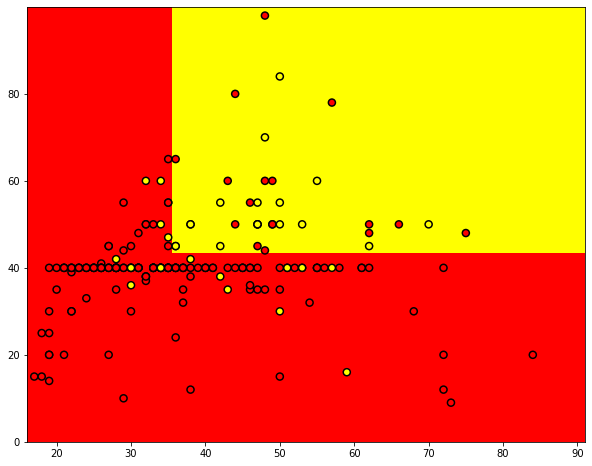

In [24]:
tree = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
exp1_data_train = train_data[['age','hours-per-week']]
exp1_data_labels = train_data['answerIS<=50K']
tree.fit(exp1_data_train, exp1_data_labels)

x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

Что-то вышло... Давайте теперь ошибку посмотрим.

In [31]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

exp1_data_test = test_data[['age','hours-per-week']]
exp1_data_tlabels = test_data['answerIS<=50K']

prediction = tree.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

0.748738379814077
0.41640962368908085
0.6193162352493339


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Temp/ipykernel_7792/4004288811.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


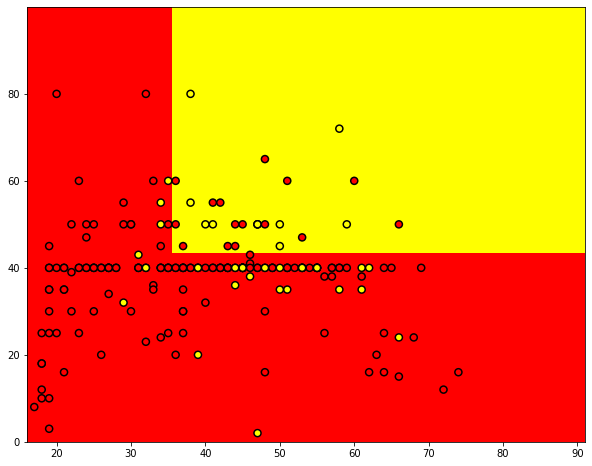

In [33]:
tree = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
exp1_data_train = train_data[['age','hours-per-week']]
exp1_data_labels = train_data['answerIS<=50K']
tree.fit(exp1_data_train, exp1_data_labels)

x_min, x_max = exp1_data_train.to_numpy()[:, 0].min() - 1, exp1_data_train.to_numpy()[:, 0].max() + 1
y_min, y_max = exp1_data_train.to_numpy()[:, 1].min() - 1, exp1_data_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, exp1_data_train.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(exp1_data_train.to_numpy()[random_indxs, 0], exp1_data_train.to_numpy()[random_indxs, 1], 
            c=exp1_data_labels[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5);

In [34]:
exp1_data_test = test_data[['age','hours-per-week']]
exp1_data_tlabels = test_data['answerIS<=50K']

prediction = tree.predict(exp1_data_test)

print(accuracy_score(exp1_data_tlabels, prediction))
print(f1_score(exp1_data_tlabels, prediction))
print(roc_auc_score(exp1_data_tlabels, prediction))

0.748738379814077
0.41640962368908085
0.6193162352493339


Получили идентичные решающие деревья.

# Задание 2 ДЗ.

In [51]:
hw_tree = DecisionTreeClassifier(max_depth=100, criterion='gini', random_state=42)
hw_data_train = train_data.copy()
hw_data_labels = train_data.copy()

In [52]:
hw_data_train.drop(labels = ['answerIS<=50K'], axis=1, inplace=True)
hw_data_labels = hw_data_labels['answerIS<=50K']
hw_data_test = test_data.drop(labels = ['answerIS<=50K'], axis=1, inplace=False)
hw_data_test_l = test_data['answerIS<=50K']

In [53]:
hw_data_train

,age,workclassISPrivate,workclassISSelf-emp-not-inc,workclassISSelf-emp-inc,workclassISFederal-gov,workclassISLocal-gov,workclassISState-gov,workclassISWithout-pay,workclassISNever-worked,fnlwgt,...,native-countryISGuatemala,native-countryISNicaragua,native-countryISScotland,native-countryISThailand,native-countryISYugoslavia,native-countryISEl-Salvador,native-countryISTrinadad&Tobago,native-countryISPeru,native-countryISHong,native-countryISHoland-Netherlands
0,39,0,0,0,0,0,1,0,0,77516,...,0,0,0,0,0,0,0,0,0,0
1,50,0,1,0,0,0,0,0,0,83311,...,0,0,0,0,0,0,0,0,0,0
2,38,1,0,0,0,0,0,0,0,215646,...,0,0,0,0,0,0,0,0,0,0
3,53,1,0,0,0,0,0,0,0,234721,...,0,0,0,0,0,0,0,0,0,0
4,28,1,0,0,0,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,1,0,0,0,0,0,0,0,257302,...,0,0,0,0,0,0,0,0,0,0
30158,40,1,0,0,0,0,0,0,0,154374,...,0,0,0,0,0,0,0,0,0,0
30159,58,1,0,0,0,0,0,0,0,151910,...,0,0,0,0,0,0,0,0,0,0
30160,22,1,0,0,0,0,0,0,0,201490,...,0,0,0,0,0,0,0,0,0,0


In [54]:
hw_data_labels

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    1
30159    0
30160    0
30161    1
Name: answerIS<=50K, Length: 30162, dtype: int64

In [55]:
hw_data_test

,age,workclassISPrivate,workclassISSelf-emp-not-inc,workclassISSelf-emp-inc,workclassISFederal-gov,workclassISLocal-gov,workclassISState-gov,workclassISWithout-pay,workclassISNever-worked,fnlwgt,...,native-countryISGuatemala,native-countryISNicaragua,native-countryISScotland,native-countryISThailand,native-countryISYugoslavia,native-countryISEl-Salvador,native-countryISTrinadad&Tobago,native-countryISPeru,native-countryISHong,native-countryISHoland-Netherlands
0,25,1,0,0,0,0,0,0,0,226802,...,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,0,89814,...,0,0,0,0,0,0,0,0,0,0
2,28,0,0,0,0,1,0,0,0,336951,...,0,0,0,0,0,0,0,0,0,0
3,44,1,0,0,0,0,0,0,0,160323,...,0,0,0,0,0,0,0,0,0,0
4,34,1,0,0,0,0,0,0,0,198693,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,1,0,0,0,0,0,0,0,245211,...,0,0,0,0,0,0,0,0,0,0
15056,39,1,0,0,0,0,0,0,0,215419,...,0,0,0,0,0,0,0,0,0,0
15057,38,1,0,0,0,0,0,0,0,374983,...,0,0,0,0,0,0,0,0,0,0
15058,44,1,0,0,0,0,0,0,0,83891,...,0,0,0,0,0,0,0,0,0,0


In [56]:
hw_data_test_l

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: answerIS<=50K, Length: 15060, dtype: int64

In [57]:
hw_tree.fit(hw_data_train, hw_data_labels)

prediction = hw_tree.predict(hw_data_test)

print(accuracy_score(hw_data_test_l, prediction))
print(f1_score(hw_data_test_l, prediction))
print(roc_auc_score(hw_data_test_l, prediction))

0.80398406374502
0.6085918854415275
0.7420453464027408


# Задание 3 ДЗ.

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=100, criterion='gini', random_state=42)

rf.fit(hw_data_train, hw_data_labels)

prediction = rf.predict(hw_data_test)

print(accuracy_score(hw_data_test_l, prediction))
print(f1_score(hw_data_test_l, prediction))
print(roc_auc_score(hw_data_test_l, prediction))

0.8454183266932271
0.662020905923345
0.7681433193757137
